In [35]:
import pandas as pd
import numpy as np

In [36]:
# read in all our data
nfl_data = pd.read_csv("datasets/NFL Play by Play 2009-2017 (v4).csv", index_col=0)

C:\Users\Eddy.Arias\AppData\Local\Temp\ipykernel_13480\1938517117.py:2: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv("datasets/NFL Play by Play 2009-2017 (v4).csv", index_col=0)


In [40]:
pd.set_option('display.max_columns', None)
nfl_data.head()

,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,NaN,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,NaN,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,NaN,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [20]:
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407688 entries, 2009-09-10 to 2017-12-31
Columns: 101 entries, GameID to Season
dtypes: float64(33), int64(31), object(37)
memory usage: 317.3+ MB


In [21]:
nfl_data

,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
Date,,,,,,,,,,,,,,,,,,,,,
2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,2017123101,29,4,NaN,00:28,1,28.0,4.0,BAL,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
2017-12-31,2017123101,29,4,3.0,00:28,1,28.0,0.0,BAL,23.0,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
2017-12-31,2017123101,29,4,4.0,00:24,1,24.0,4.0,BAL,23.0,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017


<Axes: >

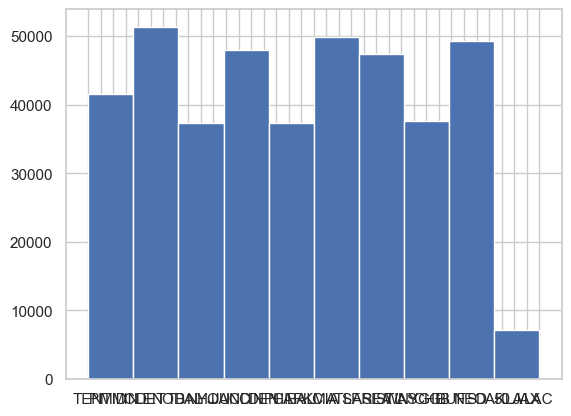

In [22]:
nfl_data["SideofField"].hist()

In [23]:
nfl_data.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,4.076880e+05,407688.000000,407688.000000,346534.000000,407688.000000,407464.000000,407244.000000,406848.000000,406848.000000,407688.000000,...,159190.000000,382734.000000,382734.000000,381101.000000,381101.000000,382679.000000,402147.000000,159187.000000,158926.000000,407688.000000
mean,2.013158e+09,12.316158,2.577412,2.002476,7.374200,1695.268944,20.576762,28.488327,48.644081,7.309403,...,-0.386086,0.534488,0.465965,0.534791,0.465613,0.501320,0.002099,0.015135,-0.010480,2013.018985
std,2.572839e+06,7.149527,1.129750,1.006353,4.642388,1062.801012,17.969326,12.946471,25.070416,4.869987,...,1.972715,0.285574,0.285629,0.287818,0.287867,0.287445,0.045363,0.056490,0.068139,2.576962
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011101e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.961115,0.325123,0.231411,0.321701,0.227694,0.276472,-0.014728,-0.011518,-0.018683,2011.000000
50%,2.013111e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531274,0.469052,0.533609,0.466670,0.504470,0.000000,0.003441,0.000000,2013.000000
75%,2.015121e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.485508,0.769232,0.675530,0.772882,0.678833,0.725477,0.014684,0.035792,0.011431,2015.000000
max,2.017123e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2017.000000


In [24]:
nfl_data.isnull().sum().sum()

11505187

In [25]:
nfl_data["time"].isnull().sum()

224

In [26]:
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407688 entries, 2009-09-10 to 2017-12-31
Columns: 101 entries, GameID to Season
dtypes: float64(33), int64(31), object(37)
memory usage: 333.4+ MB


In [27]:
nfl_data.dropna()


,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
Date,,,,,,,,,,,,,,,,,,,,,


In [28]:
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407688 entries, 2009-09-10 to 2017-12-31
Columns: 101 entries, GameID to Season
dtypes: float64(33), int64(31), object(37)
memory usage: 333.4+ MB


In [29]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
yrdln             840
dtype: int64

In [30]:
nfl_data = nfl_data.drop('SideofField', axis=1)

In [31]:
nfl_data = nfl_data.select_dtypes(include=['int64', 'float64'])

In [32]:
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407688 entries, 2009-09-10 to 2017-12-31
Data columns (total 64 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   GameID                       407688 non-null  int64  
 1   Drive                        407688 non-null  int64  
 2   qtr                          407688 non-null  int64  
 3   down                         346534 non-null  float64
 4   TimeUnder                    407688 non-null  int64  
 5   TimeSecs                     407464 non-null  float64
 6   PlayTimeDiff                 407244 non-null  float64
 7   yrdln                        406848 non-null  float64
 8   yrdline100                   406848 non-null  float64
 9   ydstogo                      407688 non-null  int64  
 10  ydsnet                       407688 non-null  int64  
 11  GoalToGo                     406848 non-null  float64
 12  FirstDown                    378877 non-null  floa

array([[<Axes: title={'center': 'Accepted.Penalty'}>,
        <Axes: title={'center': 'Opp_Field_Goal_Prob'}>,
        <Axes: title={'center': 'Fumble'}>,
        <Axes: title={'center': 'Field_Goal_Prob'}>,
        <Axes: title={'center': 'ExPoint_Prob'}>,
        <Axes: title={'center': 'ydsnet'}>],
       [<Axes: title={'center': 'Season'}>,
        <Axes: title={'center': 'ScoreDiff'}>,
        <Axes: title={'center': 'Onsidekick'}>,
        <Axes: title={'center': 'Away_WP_post'}>,
        <Axes: title={'center': 'down'}>,
        <Axes: title={'center': 'FieldGoalDistance'}>],
       [<Axes: title={'center': 'AirYards'}>,
        <Axes: title={'center': 'qtr'}>,
        <Axes: title={'center': 'AbsScoreDiff'}>,
        <Axes: title={'center': 'Safety'}>,
        <Axes: title={'center': 'Penalty.Yards'}>,
        <Axes: title={'center': 'AwayTimeouts_Remaining_Pre'}>],
       [<Axes: title={'center': 'Opp_Touchdown_Prob'}>,
        <Axes: title={'center': 'TwoPoint_Prob'}>,
      

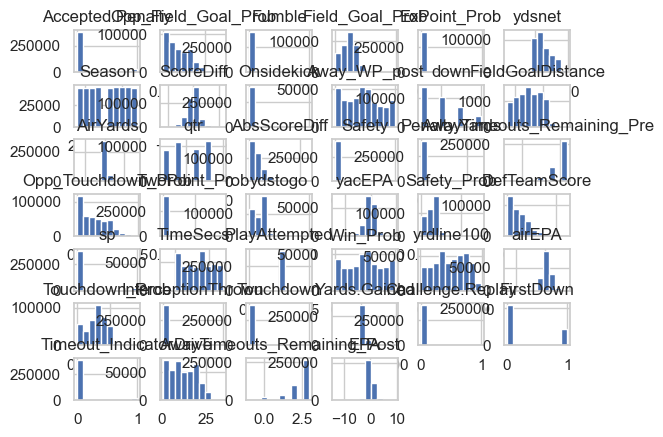

In [33]:
nfl_data = nfl_data.sample(n=40, axis=1)

nfl_data.hist()

<Axes: >

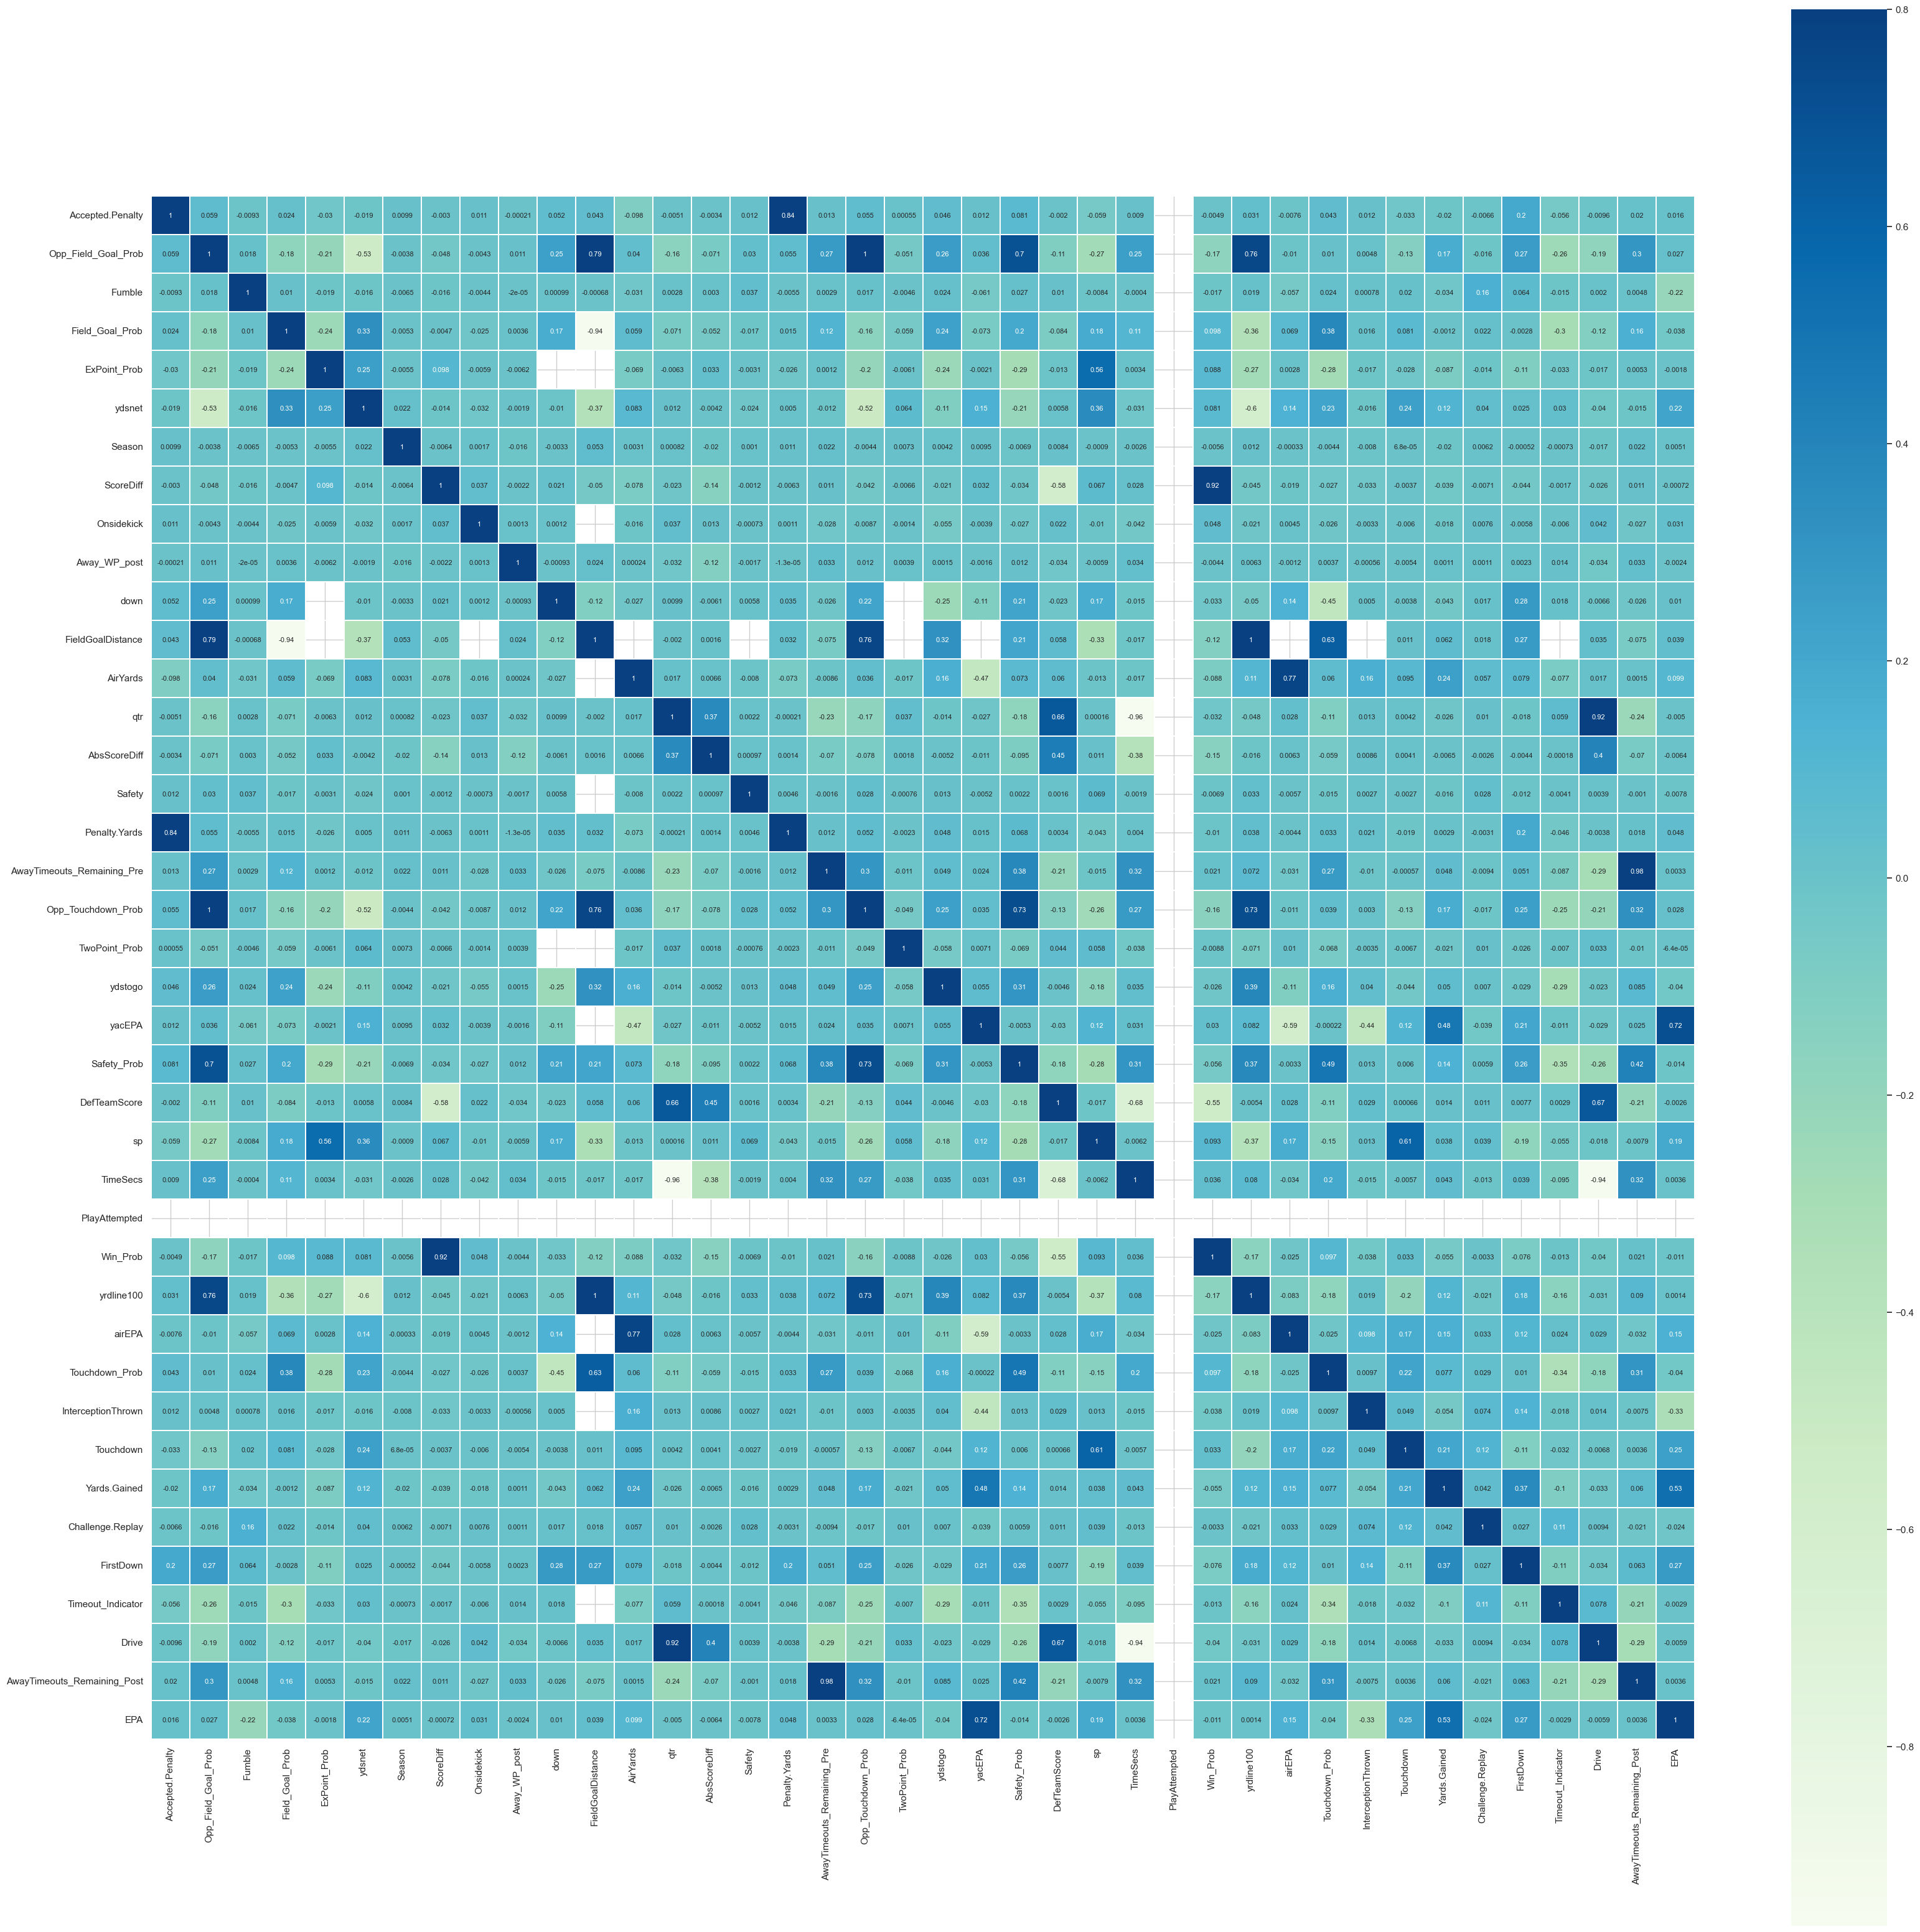

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid', font_scale=1)
plt.figure(figsize=(40,40))
sns.heatmap(nfl_data.corr(),
            linewidths=0.25,
            vmax=0.8,
            square=True,
            cmap="GnBu",
            annot=True,
            annot_kws={"size":8})


In [18]:
nfl_data

,Reception,Challenge.Replay,HomeTimeouts_Remaining_Post,qtr,HomeTimeouts_Remaining_Pre,FieldGoalDistance,ydsnet,WPA
Date,,,,,,,,
2009-09-10,0,0,3,1,3,NaN,0,0.060758
2009-09-10,1,0,3,1,3,NaN,5,0.004655
2009-09-10,0,0,3,1,3,NaN,2,-0.040295
2009-09-10,0,0,3,1,3,NaN,2,-0.049576
2009-09-10,0,0,3,1,3,NaN,2,0.097712
...,...,...,...,...,...,...,...,...
2017-12-31,0,0,2,4,3,NaN,-4,0.000000
2017-12-31,0,0,2,4,2,NaN,-4,-0.029931
2017-12-31,1,0,2,4,2,NaN,9,-0.019597


In [72]:
nfl_data = nfl_data.dropna()

x = nfl_data.drop('EPA', axis=1)
y = nfl_data['EPA']

x_test=nfl_data['EPA']

In [74]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
def modeloSVR(x_train, y_train, x_test, y_test):
    cls= SVR(kernel='linear')

    cls.fit(x_train,y_train)
    print(cls.score(x_train,y_train))
    print(cls.score(x_test, y_test))
    return cls

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

modeloSvcPrimer = modeloSVR(x_train, y_train, x_test, y_test)